<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_12/02_pca_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Additional Imports here

# plots 
import seaborn as sns
import matplotlib.pyplot as plt

# Scalers
from sklearn.preprocessing import StandardScaler

#split
from sklearn.model_selection import train_test_split

#LogisticRegression
from sklearn.linear_model import LogisticRegression

#Accuracy, recall, and precision
from sklearn import metrics

#PCA
from sklearn.decomposition import PCA


<center><H1>PCA With Diabetes Dataset</H1></center>

<p align="center">
  <img width="500" height="200" src="https://i.gifer.com/H7zW.gif">
</p>


👉🏼 [Data Dictionary](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 👈🏼

<center><H3>Steps (Must be performed in this order)</H></center>

1. [Split Data](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
2. EDA (Show us your opinion of the 2 best plots explaining the most important insights int the data). 
    - **Plots Require**:
        - Title
        - Axis Labels
        - Legend
        - A short explanation why it is important as if you were explaining it to someone who has never seen the plot before and is unfamiliar with the data.
3. Determine Baseline Model
4. [Scale Data](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. [Create Logistic Regression Model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
6. Compare Results to Baseline
7. [Perform PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
8. Use Your Principal Components for a Logistic Regression Model
9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

✨BONUS✨
 - Create a Scree Plot (You will probably have to research this)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
364,4,147,74,25,293,34.9,0.385,30,0
198,4,109,64,44,99,34.8,0.905,26,1
65,5,99,74,27,0,29.0,0.203,32,0


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# <span style="color:#EF7C8E">1. Split dataset </span>

In [6]:
#split dataset in features and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols]                # Features
y = df.Outcome                      # Target 

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # 80% training and 20% test

#   <span style="color:#EF7C8E">2. EDA</span>

### About the dataset (Pima Indians Diabetes): 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Attributes Meaning: 
- Pregnancies: Number of times pregnant. 
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 
- BloodPressure: Diastolic blood pressure (mm Hg). 
- SkinThickness: Triceps skin fold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg/(height in m)^2).
- DiabetesPedigreeFunction: Diabetes pedigree function.
- Age: Age (years). 
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

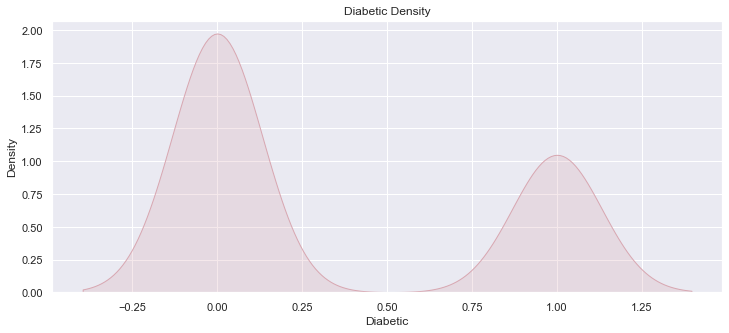

In [8]:
plt.figure(figsize=(12,5)) # figure size 
sns.set_theme(style="darkgrid") # set a theme 
palette = ['#D8A7B1','#B6E2D3', '#FAE8E0', '#EF7C8E', '#8FDDE7', '#FBE5C8', '#A49393']
sns.set_palette(palette)  # set color palette
sns.kdeplot(y_train, 
                shade=True, 
                color ='#D8A7B1')
plt.title("Diabetic Density")
plt.xlabel('Diabetic')
plt.show()

### <span style="color:#EF7C8E">Explanation: </span>
- This chart shows us the density of women's who have diabetes and who don't have diabetes 
- 1 means they have diabetes
- 0 means they don't have diabetes 

### <span style="color:#EF7C8E">Important Insights: </span>

- Most of the women's in the dataset does not have diabetes

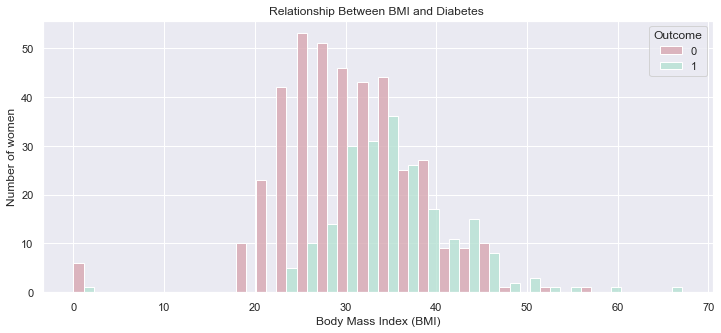

In [9]:
plt.figure(figsize=(12,5)) # figure size 

b2 = sns.histplot(
    X_train,                     # data 
    x= 'BMI',                    # Body mass index
    hue=y_train,                 # Diabetes 
    multiple="dodge",            # aside  
    alpha=.8,                    # transparency
    bins=30,                     # number of bins
)

plt.title("Relationship Between BMI and Diabetes ")
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Number of women')
plt.show()

### <span style="color:#EF7C8E">Explanation: </span>
- This chart shows us the relationship between the body mass index and diabetes
- Pink bars women's don't have diabetes
- Green bars women's have diabetes 

### <span style="color:#EF7C8E">Important Insights: </span>

- After BMI exceed 24 women start to have diabetes. 
- The greater BMI the higher chance of women having diabetes. 
- After BMI exceeds 40 the number of women who have diabetes is more than the women's don't have diabetes. 

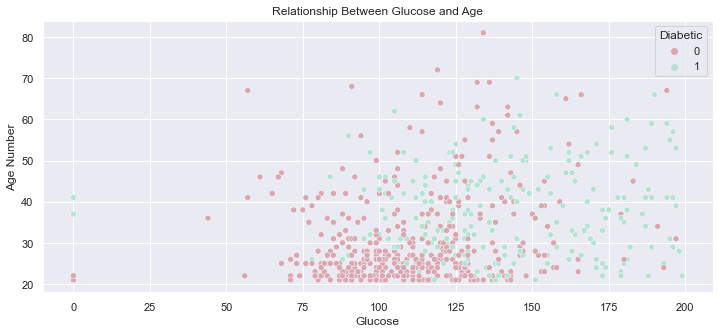

In [10]:
plt.figure(figsize=(12,5)) # figure size 
sns.scatterplot(data=X_train, 
                x="Glucose", 
                y="Age", 
                hue=y_train, 
                )
plt.title("Relationship Between Glucose and Age")
plt.legend(title = "Diabetic")
plt.ylabel('Age Number')
plt.show()

### <span style="color:#EF7C8E">Explanation: </span>
- This chart shows us the relationship between glucose, age and diabetes
- Pink dots women's don't have diabetes
- Green dots women's have diabetes 

### <span style="color:#EF7C8E">Important Insights: </span>

- Age has no effect on women having diabetes, womens have diabetes in all age ranges. 
- The greater glucose the higher chance of women having diabetes. 
- After glucose exceeds 140 the number of women who have diabetes is more than the women's that don't have diabetes. 

# <span style="color:#EF7C8E">3. Determine Baseline Model</span>

In [11]:
# Baseline 
Baseline = y_train.value_counts(normalize=True)
Baseline

0    0.653094
1    0.346906
Name: Outcome, dtype: float64

# <span style="color:#EF7C8E">4. Scale Data</span> 

In [12]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# <span style="color:#EF7C8E">5. Create Logistic Regression Model </span> 

In [13]:
# LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

# Model Accuracy, recall, and precision
print("Accuracy:",metrics.accuracy_score(y_test, y_pred),
      "\nRecall:",metrics.recall_score(y_test, y_pred),
      "\nPrecision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.7532467532467533 
Recall: 0.6727272727272727 
Precision: 0.6491228070175439


# <span style="color:#EF7C8E">6. Compare Results to Baseline</span>  

In [14]:
print('--'*20)
print('Baseline:')
print('Accuracy: ',Baseline[0])
print('--'*20)
print('Logistic Regression')
# Model Accuracy, recall, and precision
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred),
      "\nRecall:   ",metrics.recall_score(y_test, y_pred),
      "\nPrecision:",metrics.precision_score(y_test, y_pred))
print('--'*20)
print('\nThe baseline have an accuracy of 65%, but in the Logistic Regression model the accuracy is 75% so our Logistic Regression outperform the Baseline ')

----------------------------------------
Baseline:
Accuracy:  0.6530944625407166
----------------------------------------
Logistic Regression
Accuracy:  0.7532467532467533 
Recall:    0.6727272727272727 
Precision: 0.6491228070175439
----------------------------------------

The baseline have an accuracy of 65%, but in the Logistic Regression model the accuracy is 75% so our Logistic Regression outperform the Baseline 


# <span style="color:#EF7C8E">7. Perform PCA</span>   

In [15]:
# Instantiate & fit data using PCA
pca = PCA(n_components=6)
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)


In [16]:
pd.Series(pca.explained_variance_ratio_) 

0    0.255333
1    0.220703
2    0.128005
3    0.111250
4    0.097158
5    0.088006
dtype: float64

# <span style="color:#EF7C8E">8. Use Your Principal Components for a Logistic Regression Model </span>   

In [17]:
# LogisticRegression
classifier = LogisticRegression()
classifier.fit(pca_train, y_train)
pca_y_pred = classifier.predict(pca_test)

# Model Accuracy, recall, and precision
print("Accuracy:",metrics.accuracy_score(y_test, pca_y_pred),
      "\nRecall:",metrics.recall_score(y_test, pca_y_pred),
      "\nPrecision:",metrics.precision_score(y_test, pca_y_pred))

Accuracy: 0.7727272727272727 
Recall: 0.6545454545454545 
Precision: 0.6923076923076923


# <span style="color:#EF7C8E">9. Compare Results to Baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA </span>   

In [18]:
print('--'*20)
print('Baseline:')
print('Accuracy: ',Baseline[0])
print('--'*20)
print('Logistic Regression')
# Model Accuracy, recall, and precision
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred),
      "\nRecall:   ",metrics.recall_score(y_test, y_pred),
      "\nPrecision:",metrics.precision_score(y_test, y_pred))
print('--'*20)
print('Logistic Regression with PCA')
# Model Accuracy, recall, and precision
print("Accuracy: ",metrics.accuracy_score(y_test, pca_y_pred),
      "\nRecall:   ",metrics.recall_score(y_test, pca_y_pred),
      "\nPrecision:",metrics.precision_score(y_test, pca_y_pred))

print('--'*20)
print('\nThe Logistic Regression with PCA outperform the Logistic Regression without PCA and the baseline')
print('\nPCA helps reorganize the columns based on importance so the most important columns come at first and the least importance comes at the end, so PCA helps us in selecting only the columns we need for our model')

----------------------------------------
Baseline:
Accuracy:  0.6530944625407166
----------------------------------------
Logistic Regression
Accuracy:  0.7532467532467533 
Recall:    0.6727272727272727 
Precision: 0.6491228070175439
----------------------------------------
Logistic Regression with PCA
Accuracy:  0.7727272727272727 
Recall:    0.6545454545454545 
Precision: 0.6923076923076923
----------------------------------------

The Logistic Regression with PCA outperform the Logistic Regression without PCA and the baseline

PCA helps reorganize the columns based on importance so the most important columns come at first and the least importance comes at the end, so PCA helps us in selecting only the columns we need for our model


# <span style="color:#EF7C8E">10. Scree Plot </span>   

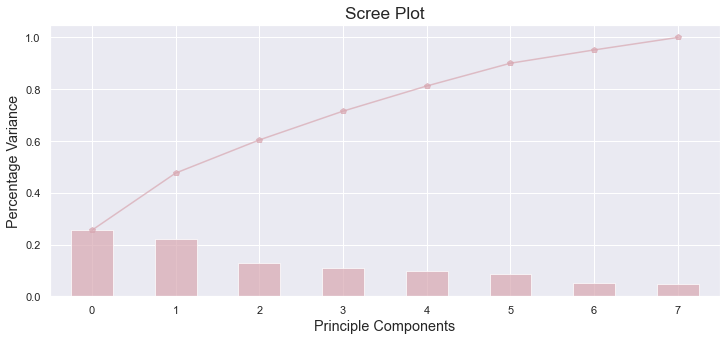

In [19]:
# Instantiate & fit data using PCA
pca = PCA()
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

plt.figure(figsize=(12,5))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) 

total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="p", alpha=0.7)
plt.xlabel("Principle Components", fontsize="large")
plt.ylabel("Percentage Variance", fontsize="large")
plt.title("Scree Plot", fontsize="x-large")
plt.show();